In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from vi import VI
import utils
from mdp import MDP
from vi import VI

In [ ]:
print(utils.action_space)

[(-1, 0), (0, -1), (1, 0), (0, 1)]


(-1, 0) - moving up \\
(0, -1) - moving left \\
(1, 0) - moving down \\
(0, 1) - moving right

B. From lectures we know that $$G^* = \min_{u_k} \{(l(x_k, u_k) + G^*_{k+1}(x_{k+1})\}$$

In [ ]:
data = np.load('data_ps3.npz')
environment_grid = data['environment']
# environment_grid
s_ini = (0,0)
goal = (21,17)
epsilon = 0.4 #Propagation probability (see utils)

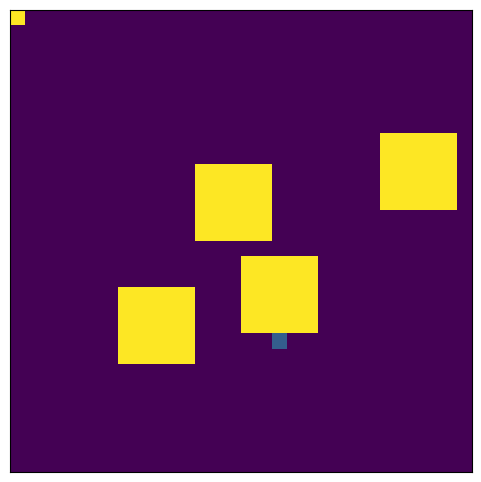

In [ ]:
environment = utils.Environment(environment_grid, s_ini, goal, epsilon)
fig, ax = plt.subplots(figsize=(6, 6))

im = environment.plot_enviroment(s_ini, goal)
im = ax.matshow(im)

ax.set_xticks([])
ax.set_yticks([])

plt.show()

<ipython-input-8-91d3cebe831c>:39: RuntimeWarning: invalid value encountered in subtract
  if np.max(np.abs(self._G - G_prev)) < threshold:


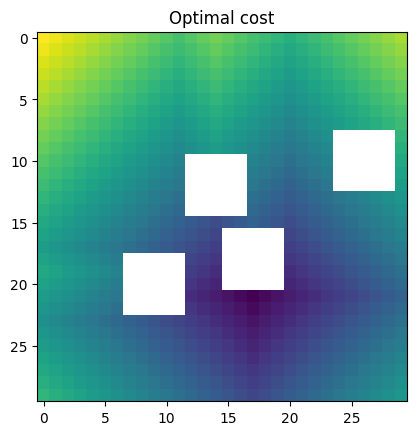

In [ ]:
plt.imshow(VI(environment, goal=goal).calculate_value_function())
plt.title('Optimal cost')
plt.show()

D. In our case:
$$
a^* = argmin_{a \in \mathcal{A}(s)} \left\{l(s, a) + G^*(f(s, a)) \right\}
$$

num_iterations 0
state (1, 0)
action 2

num_iterations 1
state (2, 0)
action 2

num_iterations 2
state (3, 0)
action 2

num_iterations 3
state (4, 0)
action 2

num_iterations 4
state (5, 0)
action 2

num_iterations 5
state (6, 0)
action 2

num_iterations 6
state (7, 0)
action 2

num_iterations 7
state (8, 0)
action 2

num_iterations 8
state (9, 0)
action 2

num_iterations 9
state (10, 0)
action 2

num_iterations 10
state (11, 0)
action 2

num_iterations 11
state (12, 0)
action 2

num_iterations 12
state (13, 0)
action 2

num_iterations 13
state (14, 0)
action 2

num_iterations 14
state (15, 0)
action 2

num_iterations 15
state (16, 0)
action 2

num_iterations 16
state (17, 0)
action 2

num_iterations 17
state (17, 1)
action 3

num_iterations 18
state (17, 2)
action 3

num_iterations 19
state (17, 3)
action 3

num_iterations 20
state (17, 4)
action 3

num_iterations 21
state (17, 5)
action 3

num_iterations 22
state (17, 6)
action 3

num_iterations 23
state (17, 7)
action 3

num_iterati

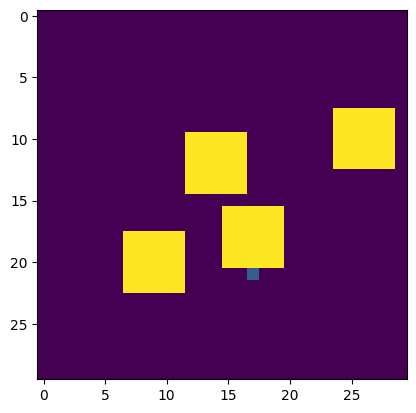

In [ ]:
vi.calculate_policy()

state = s_ini
environment.reset(state)

fig = plt.figure()
images = []
for i in range(100):
    im = environment.plot_enviroment(state, goal)
    plot = plt.imshow(im)
    images.append([plot])
    a = vi.policy(state)
    state, _, safe_propagation, success_indicator = environment.step(action_space[a], epsilon=0.001)
    if not safe_propagation:
        print('You died', state)
        break
    print('num_iterations', i)
    print('state', state)
    print('action', a)
    print()
    if success_indicator:
        print('We achieved goal state in ', i, 'iterations')
        im = environment.plot_enviroment(state, goal)
        plot = plt.imshow(im)
        images.append([plot])
        break

ani = animation.ArtistAnimation(fig, images, interval=100, blit=True)
ani.save('plan_vi.mp4')
plt.show()

In some runnings of the code I died

Now part with MDP. A and B fro lectures.

A.
$$
v_*(s) = \max\limits_{a \in \mathcal{A}(s)}\sum\limits_{s', r} p(s', r|s, a) [r + \gamma v_*(s')]
$$

B. If $a_t = argmax_{a_t} q_*(s_t, a_t)$ then $\pi(a_t|s_t) = 1$ otherwise it's equal to $0$
where $q_*(s_t, a_t) = \mathbb{E}[R_{t+1} + \gamma v_*(s_{t+1})| s_t, a_t]$.

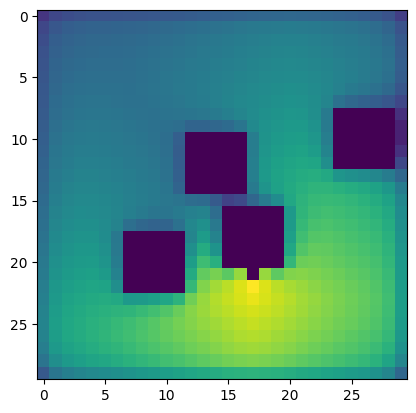

In [ ]:
plt.imshow(MDP(env=environment, goal=goal, gamma=0.99).calculate_value_function())
plt.show()

In [ ]:
MDP.calculate_policy()

state = s_ini
environment.reset(state)

fig = plt.figure()
images = []
for i in range(100):
    im = environment.plot_enviroment(state, goal)
    plot = plt.imshow(im)
    images.append([plot])
    a = vi.policy(state)
    state, _, safe_propagation, success_indicator = environment.step(action_space[a], epsilon=0.001)
    if not safe_propagation:
        print('You died', state)
        break
    print('num_iterations', i)
    print('state', state)
    print('action', a)
    print()
    if success_indicator:
        print('We achieved goal state in ', i, 'iterations')
        im = environment.plot_enviroment(state, goal)
        plot = plt.imshow(im)
        images.append([plot])
        break

ani = animation.ArtistAnimation(fig, images, interval=100, blit=True)
ani.save('plan_vi.mp4')
plt.show()

TypeError: MDP.calculate_policy() missing 1 required positional argument: 'self'

Other tasks are simple but I have this problem and I can't solve it quickly, maybe it's problem with collab. Anyway I don't want to spend more time because it's already late